<a href="https://colab.research.google.com/github/AKookani/Collaborative-Filtering-for-Movie-Recommendations/blob/main/RecSys_Matrix_Factorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np

# Example user-item matrix (4 users, 5 items)
# Rows: Users, Columns: Items, Values: Ratings (0 means no rating)
R = np.array([
    [5, 3, 0, 1, 4],
    [4, 0, 0, 1, 3],
    [1, 1, 0, 5, 0],
    [0, 0, 4, 4, 0]
])
R, R.shape

(array([[5, 3, 0, 1, 4],
        [4, 0, 0, 1, 3],
        [1, 1, 0, 5, 0],
        [0, 0, 4, 4, 0]]),
 (4, 5))

In [10]:
# Hyperparameters
k = 2  # Number of latent factors
learning_rate = 0.01
lambda_reg = 0.1  # Regularization strength
epochs = 1000

In [11]:
# Initialize user and item latent factor matrices
n_users, n_items = R.shape
U = np.random.rand(n_users, k)  # User latent factors
I = np.random.rand(n_items, k)  # Item latent factors

U.shape, I.shape

((4, 2), (5, 2))

In [13]:
np.dot(U, I.T)

array([[0.65161277, 0.77778439, 0.46510408, 0.81440823, 0.35708815],
       [0.21889228, 0.17150458, 0.08722006, 0.28389591, 0.08168201],
       [0.87051592, 1.0849524 , 0.65662445, 1.0827285 , 0.49660802],
       [0.96809084, 1.14592464, 0.68360364, 1.21105874, 0.52642006]])

In [14]:
# Gradient Descent
for epoch in range(epochs):
    for u in range(n_users):
        for i in range(n_items):
            if R[u, i] > 0:  # Only consider observed ratings
                # Compute prediction error
                prediction = np.dot(U[u], I[i])
                error = R[u, i] - prediction

                # Update user and item latent factors
                U[u] += learning_rate * (error * I[i] - lambda_reg * U[u])
                I[i] += learning_rate * (error * U[u] - lambda_reg * I[i])

In [15]:
# Reconstruct the predicted ratings matrix
predicted_R = np.dot(U, I.T)
print("Predicted Ratings Matrix:")
print(predicted_R)

Predicted Ratings Matrix:
[[4.84186062 2.87148576 3.02416361 1.02838053 3.82412558]
 [3.77947255 2.25751767 2.48275682 0.98927877 3.00066736]
 [1.011856   0.9873053  3.5723697  4.70544934 1.17520807]
 [2.7410597  1.91263442 3.8916669  3.91091926 2.44365204]]


Epoch 100, RMSE: 0.1523
Epoch 200, RMSE: 0.1442
Epoch 300, RMSE: 0.1432
Epoch 400, RMSE: 0.1425
Epoch 500, RMSE: 0.1420
Epoch 600, RMSE: 0.1416
Epoch 700, RMSE: 0.1413
Epoch 800, RMSE: 0.1411
Epoch 900, RMSE: 0.1409
Epoch 1000, RMSE: 0.1408
Predicted Ratings Matrix:
[[4.84048608 2.87102496 3.37461612 1.02580711 3.82673738]
 [3.78138024 2.25935966 2.74579898 0.9928513  2.99732318]
 [1.01169763 0.98764962 3.27571649 4.70726312 0.98474336]
 [2.88036686 1.99272137 3.89350232 3.9059741  2.4127739 ]]


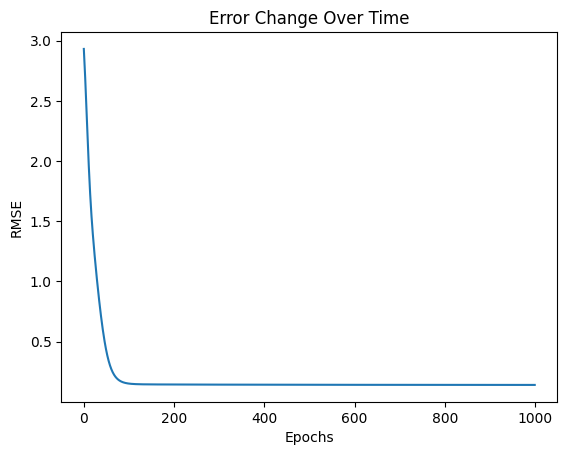

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Example user-item matrix (4 users, 5 items)
R = np.array([
    [5, 3, 0, 1, 4],
    [4, 0, 0, 1, 3],
    [1, 1, 0, 5, 0],
    [0, 0, 4, 4, 0]
])

# Hyperparameters
k = 2  # Number of latent factors
learning_rate = 0.01
lambda_reg = 0.1  # Regularization strength
epochs = 1000

# Initialize user and item latent factor matrices
n_users, n_items = R.shape
U = np.random.rand(n_users, k)  # User latent factors
I = np.random.rand(n_items, k)  # Item latent factors

# Track error over epochs
errors = []

# Gradient Descent
for epoch in range(epochs):
    total_error = 0
    count = 0
    for u in range(n_users):
        for i in range(n_items):
            if R[u, i] > 0:  # Only consider observed ratings
                # Compute prediction error
                prediction = np.dot(U[u], I[i])
                error = R[u, i] - prediction
                total_error += error ** 2
                count += 1

                # Update user and item latent factors
                U[u] += learning_rate * (error * I[i] - lambda_reg * U[u])
                I[i] += learning_rate * (error * U[u] - lambda_reg * I[i])

    # Compute RMSE
    rmse = np.sqrt(total_error / count)
    errors.append(rmse)

    # Print error every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}, RMSE: {rmse:.4f}")

# Reconstruct the predicted ratings matrix
predicted_R = np.dot(U, I.T)
print("Predicted Ratings Matrix:")
print(predicted_R)

# Plot error change
plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.title("Error Change Over Time")
plt.show()